['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
[251.588803, 169.87862600000005, 120.080795, 133.80402, 167.27730400000002, 282.61097, 231.776582, 274.840276, 226.395666, 250.224681, 398.934777, 348.756074, 369.726648, 383.334212, 381.562993, 446.89089, 474.543916, 544.11048445, 802.52185663, 583.8496046099999, 762.67711375, 859.19438445, 728.07439383, 733.3699006599999, 634.40771744, 539.04226946, 621.68308488, 793.72068, 936.4734, 814.6487199999999, 576.9881899999999, 663.70932, 780.5833900000001]


<Figure size 9600x7200 with 0 Axes>

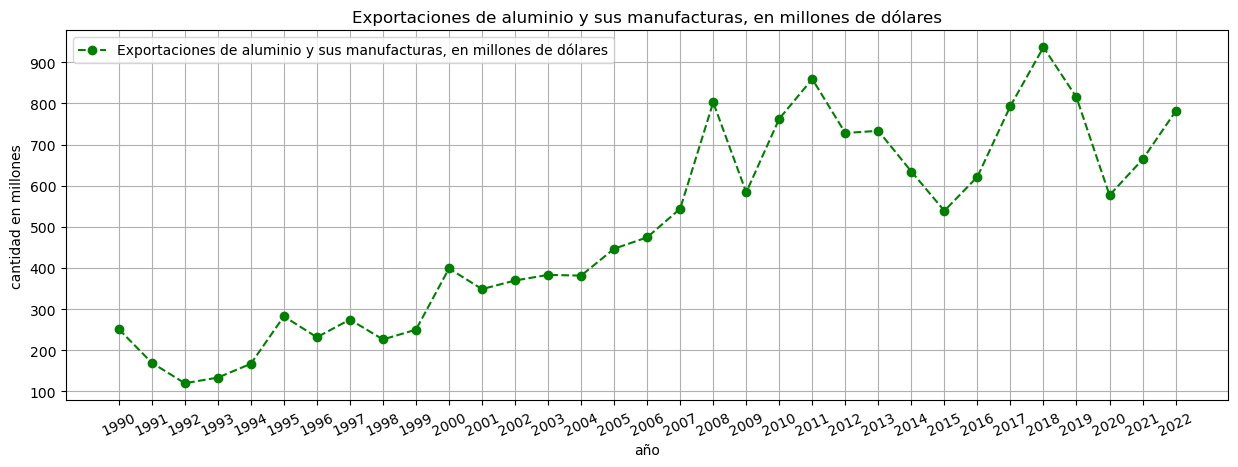

In [2]:
import pandas as pd
import requests
import csv
import matplotlib.pyplot as plt

url = 'https://apis.datos.gob.ar/series/api/series?ids=162.1_XUMINIORAS_0_0_23'
response = requests.get(url)

x=[]
y=[]
cont = 0
if response.status_code == 200:
    data = response.json()
    data_rows = data['data']
    campos = ["fecha", "cantMillones"]
    with open("data.csv", mode="w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(campos)
        writer.writerows(data_rows)
    with open("data.csv", mode="r") as csvfile:
        for row in csvfile:
            if(cont != 0):
                x.append(row[0:4:1])
                y.append(float(str((row[11:len(row)-1:1]))))
            cont+=1

print(x)
print(y)

plt.figure(dpi=1500)
plt.figure().set_figwidth(15)
plt.plot(x, y, color = 'g', linestyle = 'dashed',marker = 'o',label = "Exportaciones de aluminio y sus manufacturas, en millones de dólares")

plt.xticks(rotation = 25)
plt.xlabel('año')
plt.ylabel('cantidad en millones')
plt.title('Exportaciones de aluminio y sus manufacturas, en millones de dólares', fontsize = 12)
plt.grid()
plt.legend()
plt.savefig("fotarda.png")
plt.show()

# Exportaciones de aluminio

## De una página gubernamental, obtuvimos información que describe las exportaciones anuales de aluminio y sus manufacturas. En base a la misma, haremos un breve análisis

### Mediante el link presente en el código, se pueden ver una serie de valores, que constan de la cantidad obtenida por exportar aluminio y sus manufacturas en cada año, comenzando en 1990. Dichas cantidades están expresadas en millones de dólares, por lo que puede ordenarse la información en un gráfico de línea, en el que puede verse como, de forma progresiva, va en aumento, llegando a un pico que supera los 900 millones en 2018